🌤️ WeatherWise: Hava Durumu Tahmin Sistemi
🌟 Problem Tanımı
Hava durumu tahminleri, tarım, ulaşım, enerji yönetimi gibi birçok alanda kritik öneme sahiptir. Hatalı tahminler ekonomik kayıplara, lojistik aksamalara ve güvenlik sorunlarına yol açabilir. Bu çalışma, hava durumu tahminlerini daha isabetli hale getirmek için bir sınıflandırma modeli geliştirmeyi amaçlamaktadır. WeatherWise projesi ile bu soruna önemli bir çözüm sunulmaktadır.

🚀 Çözüm Yaklaşımı
Bu proje kapsamında, çeşitli hava durumu verilerini içeren bir veri seti kullanılarak bir sınıflandırma modeli geliştirilmiştir. Kullanılan veri seti aşağıdaki sütunları içermektedir:

🌡️ Sıcaklık (Temperature)
💧 Nem (Humidity)
🌬️ Rüzgar Hızı (Wind Speed)
☔ Yağış Oranı (Precipitation %)
☁️ Bulut Örtüsü (Cloud Cover)
📈 Atmosfer Basıncı (Atmospheric Pressure)
🌞 UV İndeksi (UV Index)
🌿 Mevsim (Season)
👁️ Görüş Mesafesi (Visibility)
📍 Konum (Location)
🌦️ Hava Türü (Weather Type - Hedef Değişken)
Veri seti üzerinde öncelikle eksik verilerin kontrolü yapılmış, ardından kategorik sütunlar sayısal verilere dönüştürülmüştür. Eğitim ve test setlerine ayrılan veri üzerinde Random Forest sınıflandırıcısı kullanılarak model eğitilmiştir. Modelin performansı doğruluk oranı (accuracy), sınıflandırma raporu (classification report) ve karışıklık matrisi (confusion matrix) kullanılarak değerlendirilmiştir. Ayrıca, rastgele bir gün seçilerek tahmin yapılmış ve bu tahminin gerçek değer ile karşılaştırılması sağlanmıştır.

📊 Sonuçlar
Modelin performansı aşağıdaki gibi elde edilmiştir:

Accuracy: 0.91

In [16]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
# Veri setini yükleyin
file_path = r'C:\Users\realb\Desktop\hava durumu tahmin modeli\weather_classification_data.csv'  # Dosya yolunuza göre değiştirin
data = pd.read_csv(file_path)

In [5]:
# Eksik değerleri kontrol edin
print(data.isnull().sum())

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [6]:
# Kategorik sütunları sayısal verilere dönüştürmek için LabelEncoder kullanın
label_encoder = LabelEncoder()

In [7]:
# Kategorik sütunları dönüştürün
data['Cloud Cover'] = label_encoder.fit_transform(data['Cloud Cover'])
data['Season'] = label_encoder.fit_transform(data['Season'])
data['Location'] = label_encoder.fit_transform(data['Location'])
data['Weather Type'] = label_encoder.fit_transform(data['Weather Type'])

In [8]:
# Özellikleri (X) ve hedef değişkeni (y) ayırın
X = data.drop(columns='Weather Type')
y = data['Weather Type']

In [9]:
# Veri setini eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Random Forest sınıflandırıcısını başlatın
rf_classifier = RandomForestClassifier(random_state=42)

In [11]:
# Modeli eğitin
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Tahminler yapın
y_pred = rf_classifier.predict(X_test)

In [13]:
# Modeli değerlendirin
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9106060606060606
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       651
           1       0.91      0.91      0.91       647
           2       0.93      0.94      0.94       701
           3       0.93      0.90      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



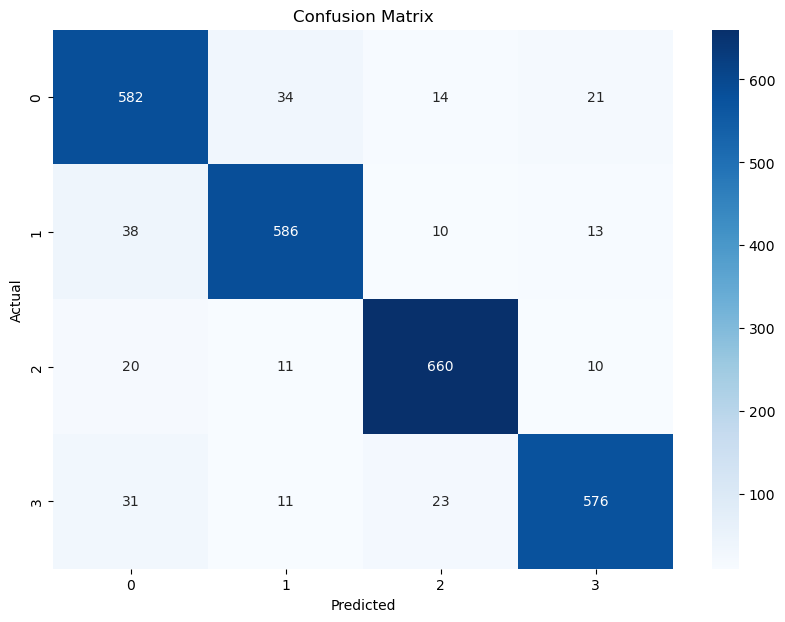

In [14]:
# Confusion matrix'i görselleştirin
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Rastgele bir indeks seçin
random_index = random.randint(0, len(X_test) - 1)

# Seçilen günün özelliklerini alın
random_day_features = X_test.iloc[random_index]
random_day_actual = y_test.iloc[random_index]

# Tahmin yapın
random_day_prediction = rf_classifier.predict([random_day_features])

# Sonuçları karşılaştırın
print(f"Seçilen günün özellikleri: \n{random_day_features}")
print(f"Gerçek Hava Türü: {label_encoder.inverse_transform([random_day_actual])[0]}")
print(f"Tahmin Edilen Hava Türü: {label_encoder.inverse_transform(random_day_prediction)[0]}")

Seçilen günün özellikleri: 
Temperature              -4.00
Humidity                 97.00
Wind Speed               15.00
Precipitation (%)        51.00
Cloud Cover               2.00
Atmospheric Pressure    994.13
UV Index                  0.00
Season                    3.00
Visibility (km)           2.00
Location                  1.00
Name: 2055, dtype: float64
Gerçek Hava Türü: Snowy
Tahmin Edilen Hava Türü: Snowy


C:\Users\realb\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
